In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fitutils as ft
import scipy.optimize as opt
import fitutils as ft
import tools
import schottky_analysis as sch
import constants as cnt
import nonlinear_acoustic_fit
import linear_acoustic_fit
import nonlinear_optic_fit
import polynomial_optic_fit
import near0_integrated_analysis
import monte_carlo as mc

### Fitting to Debye model, only acoustic modes are considered

$\frac{C}{T}(x = T²) = Cs(x) + \gamma + \beta x$, (en mJ/mol/K), with $C_s(T)$ Schottky

Optimizing $C/T(T²)$

#### Non linear fit 

Fitting the data considering the theorical model $\gamma + \beta x + Cs(x) = y(x)$, with $y = C/T$ and $x = T^2$

Between 0 and 20 K : The optimization does not describe well the data. We may stay at low temperature to use the Debye model. Monte Carlo method does not present good results, since the chi2 is not going under 3132.

Between 0 and 12 K : $\beta = 0.508 mJ//mol/K⁴$, soit une température de Debye de $367 K$, et une ordonnée à l'origine $\gamma = 0.87 mJ/K²/mol$, values are consistent with Monte Carlo method

However, by plotting the Schottky anomaly with the determined paramters, we can see it fails to describ the data, mainly because the E parameter seems underestimated,causing a shift to the left. In any case, the Schottky anomaly tends to 0 after 30 K², so we can realize a linear fit after 30 K². 

Beta, Gamma, n, E :  0.5970038026861109 1.498792972983883e-12 0.0011152918444042447 9.900000000022832e-23


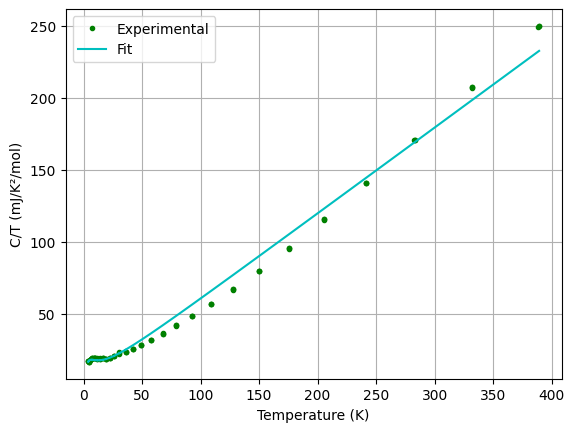

Linear fit with Monte Carlo method : chi2, beta, gamma, n, E : (3132.914972514977, array([5.95945288e-01, 2.24429300e-01, 1.08887900e-03, 9.64398859e-23]))


In [13]:
# Non linear fit between 0 K and 20 K

nonlinear_acoustic_fit.plot_fit_acoustic(0,400, cnt.squared_temperature_HPHT, cnt.hc_div_temp_HPHT, 
                                           cnt.err_sample_HC_HPHT, bounds= ([0.1, 0, 1e-3, 9.9e-23],[1, 10, 5e-2, 1.2e-22]))

# Non linear fit with Monte Carlo method

print("Linear fit with Monte Carlo method : chi2, beta, gamma, n, E :", mc.ajustement_mc(cnt.squared_temperature_HPHT, cnt.hc_div_temp_HPHT,
          nonlinear_acoustic_fit.model_acoustic, 0, 400, 1e6, ([0.45, 0.6], [0, 6], [1e-3, 5e-2], [9.5e-23, 1.2e-22]), 4))

Beta, Gamma, n, E :  0.5087573984907732 0.028954942506024615 0.0012142743780040764 1.1132397464285262e-22


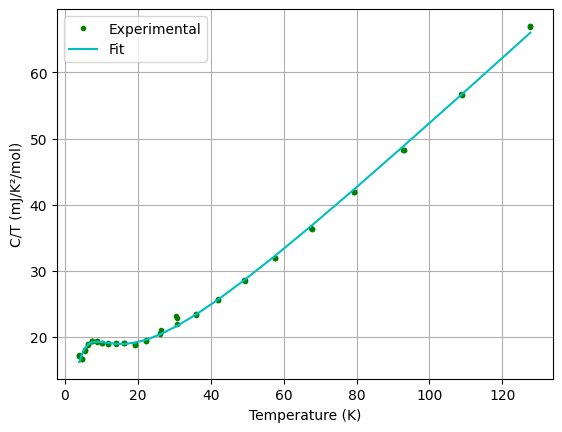

Linear fit with Monte Carlo method : chi2, beta, gamma, n, E : (15.532839356608221, array([5.06298521e-01, 2.15702881e-01, 1.20374175e-03, 1.10447398e-22]))


In [2]:
# Non linear fit between 0 K and 12 K

nonlinear_acoustic_fit.plot_fit_acoustic(0,144, cnt.squared_temperature_HPHT, cnt.hc_div_temp_HPHT, 
                                           cnt.err_sample_HC_HPHT, bounds= ([0.1, 0, 1e-3, 9e-23],[1, 10, 5e-2, 2e-22]))

# With Monte Carlo method between 0 and 12 K

print("Linear fit with Monte Carlo method : chi2, beta, gamma, n, E :", mc.ajustement_mc(cnt.squared_temperature_HPHT, cnt.hc_div_temp_HPHT,
          nonlinear_acoustic_fit.model_acoustic, 0, 144, 5e6, ([0.45, 0.52], [0, 5], [1e-3, 5e-2], [9.5e-23, 1.2e-22]), 4))


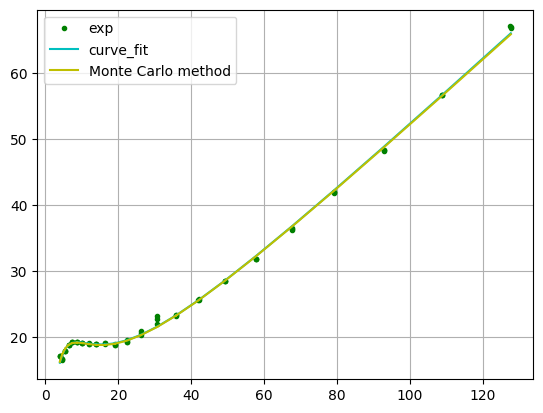

In [3]:
x, y = tools.tab_interval(cnt.squared_temperature_HPHT, cnt.hc_div_temp_HPHT, 0,144)

plt.figure()
plt.plot(x,y, ".g", label="exp")
plt.plot(x, nonlinear_acoustic_fit.model_acoustic(x, 0.5087, 0.02895, 1.21427e-3, 1.1132e-22), "-c", label="curve_fit")
plt.plot(x, nonlinear_acoustic_fit.model_acoustic(x, 0.506298, 0.21570288, 1.20374e-3, 1.1044739e-22), "-y", label="Monte Carlo method")
plt.grid(True)
plt.legend()


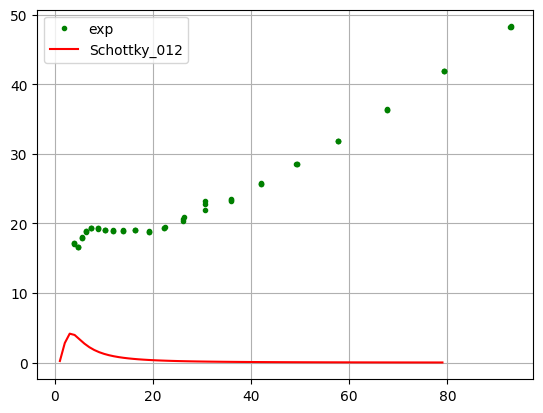

In [24]:
squared_temp_bounded, hc_div_T_bounded = tools.tab_interval(cnt.squared_temperature_HPHT, cnt.hc_div_temp_HPHT, 0, 100)
temp_test = np.arange(1, 80, 1)

#y_fit_012 = sch.schottky(np.sqrt(squared_temp_bounded), 1.1048283717601167e-22, 0.0011518575438331385)

y_fit_012_test = sch.schottky(temp_test,  1.08e-22, 1.1522e-3)

plt.figure()
plt.plot(squared_temp_bounded, hc_div_T_bounded, ".g", label="exp")
plt.plot(temp_test, y_fit_012_test, "-r", label="Schottky_012")
plt.grid(True)
plt.legend()

#### Fit linéaire

The Schottky contribution appears negligible beyond 20 K², so we can attempt to fit the data to a linear model over the ranges 0–20 K² and 0–12 K².

The data are fitted using the least‑squares method, and Monte Carlo

Between 40 and 400 K² : The fit yields unrealistic values ($\gamma$ < 0)

Between 5 K and 12 K :  We found $\beta = 0.451 mJ/K⁴/mol$, so a Debye temperature of $382.64 K$, and $\gamma = 7.31 mJ/mol/K²$. Fit consistent with Monte Carlo method ($\beta = 0.453$, $\gamma = 7.056$, $\chi ² = 50$)

Between 6 and 12 K :  We found $\beta = 0.481 mJ/K⁴/mol$, so a Debye temperature of $374.52 K$, and $\gamma = 4.43 mJ/mol/K²$, consistent with Monte Carlo method

The Schottky anomaly is supposed to be negligible after 25 K, but the maximum of the curve seems shifted to the left, so the fit between 6 and 12 K may be more accurate. In addition, the values match the litterature.

In [14]:
# Linear fit between 6 and 20 K

#linear_acoustic_fit.final(40, 400, cnt.E_optic_HPHT, cnt.n_optic_HPHT,cnt.temperature_HPHT, cnt.squared_temperature_HPHT,
                           #cnt.hc_div_temp_HPHT, cnt.err_squared_temperature_HPHT,cnt.err_hc_div_temp_HPHT)

<Figure size 640x480 with 0 Axes>

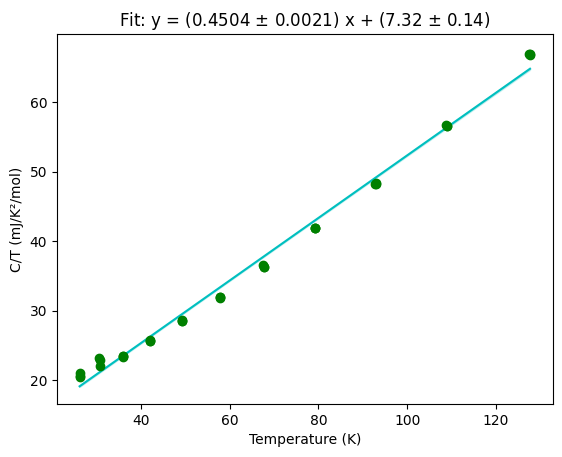

Linear fit with Monte Carlo method : chi2, beta, gamma : (50.5917794584948, array([0.45310417, 7.05842414]))


In [4]:
# Linear fit bewtween 5 and 12 K

linear_acoustic_fit.linear_fit(25, 144, cnt.squared_temperature_HPHT, cnt.hc_div_temp_HPHT, 
                               cnt.err_squared_temperature_HPHT,cnt.err_hc_div_temp_HPHT)

# Monte Carlo between 5 and 12 K 

print("Linear fit with Monte Carlo method : chi2, beta, gamma :", mc.ajustement_mc(cnt.squared_temperature_HPHT, cnt.hc_div_temp_HPHT,
          mc.model_linear, 25, 144, 5e6, ([0.4, 0.5], [6, 8]), 2))

<Figure size 640x480 with 0 Axes>

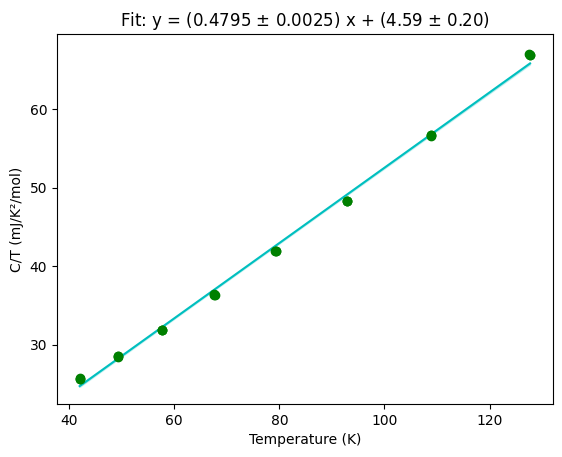

Linear fit with Monte Carlo method : chi2, beta, gamma : (12.136008304380825, array([0.4810159 , 4.43717635]))


In [5]:
# Linear fit bewtween 6 and 12 K

linear_acoustic_fit.linear_fit(36, 144, cnt.squared_temperature_HPHT, cnt.hc_div_temp_HPHT, 
                               cnt.err_squared_temperature_HPHT,cnt.err_hc_div_temp_HPHT)

# Monte Carlo between 6 and 12 K 

print("Linear fit with Monte Carlo method : chi2, beta, gamma :", mc.ajustement_mc(cnt.squared_temperature_HPHT, cnt.hc_div_temp_HPHT,
          mc.model_linear, 36, 144, 8e6, ([0.4, 0.5], [2, 10]), 2))

### Model T⁵

Adding a contribution $x²$, in order to fit the data until 20 K, not only 12 K.

#### Non linear fit

Fitting the data considering the theorical model $\gamma + \beta x + Cs(x) + \alpha x^2 = y(x)$, with $y = C/T$ and $x = T^2$

Bewtween 0 et 20 K :

With the method of grdient descent and Mont Carlo, we find a similar slope $\beta = 0.459 mJ/K⁴/mol$, (or 0.468 with MC),and a similar $\gamma$ value quite different : $\gamma = 0.566 mJ/K⁴/mol$, 
Debye temperature is therefore $380.41 K$

Beta, Gamma, n, E, nu :  0.45913868035279204 0.5664240982145297 0.001223842724940032 1.1441637446400501e-22 0.00047651468946626065


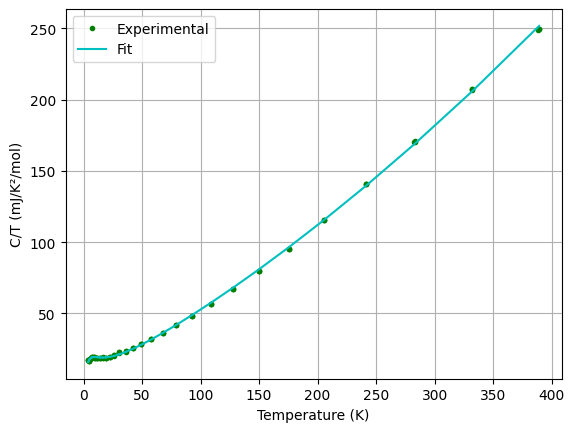

Linear fit with Monte Carlo method : chi2, beta, gamma, n, E; alpha: (73.06181030104864, array([4.68656459e-01, 5.36706938e-02, 1.24079638e-03, 1.12875209e-22,
       4.46532683e-04]))


In [6]:
# Between 0 and 20 K

nonlinear_optic_fit.plot_fit_optic(0, 400, cnt.squared_temperature_HPHT, cnt.hc_div_temp_HPHT, cnt.err_hc_div_temp_HPHT,
                   bounds=([0.3, 0, 1e-3, 9.8e-23, 0], [1, 5, 5e-2, 1.2e-22, 1]))

# With Monte Carlo

print("Linear fit with Monte Carlo method : chi2, beta, gamma, n, E; alpha:", mc.ajustement_mc(cnt.squared_temperature_HPHT, 
                                                    cnt.hc_div_temp_HPHT, nonlinear_optic_fit.model_optic, 
                                                    0, 400, 8e6, ([0.42, 0.5], [0, 10], [1e-3, 1e-2], [9.5e-23, 1.3e-22], [0, 1e-2]), 5))

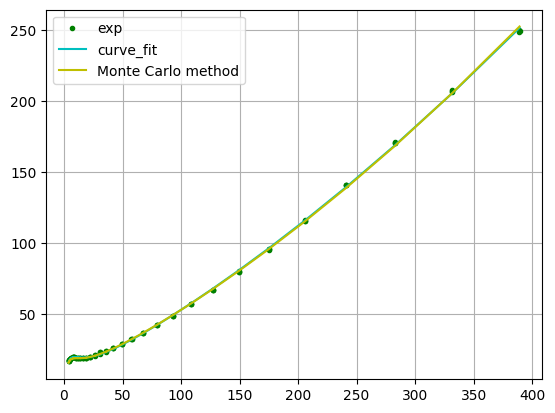

In [22]:
# Plotting curve fit and Monte Carlo fit

x, y = tools.tab_interval(cnt.squared_temperature_HPHT, cnt.hc_div_temp_HPHT, 0,400)

plt.figure()
plt.plot(x,y, ".g", label="exp")
plt.plot(x, nonlinear_optic_fit.model_optic(x,  0.4591, 0.56642, 0.001223, 1.14416e-22, 0.0004765), "-c", label="curve_fit")
plt.plot(x, nonlinear_optic_fit.model_optic(x, 0.435435, 2.65437, 1.10587e-03, 1.13697e-22,5.3021e-04), "-y", 
         label="Monte Carlo method")
plt.grid(True)
plt.legend()

#### Polynomial fit

Fitting the values after 6 K, so the Schottky contriubtion is negligible. 

We find quite the same results with gradient descent or Monte Carlo method, with  $\beta = 0.4279 mJ/K⁴/mol$, and $\gamma = 5.10  mJ/K²/mol$

Alpha, Beta, Gamma :  0.0005309730196545668 0.42797949730430873 5.034670163714075


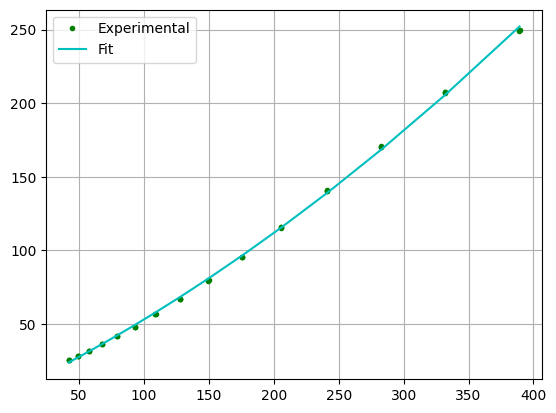

Linear fit with Monte Carlo method : chi2, alpha, beta, gamma : (83.0952628100461, array([5.30740086e-04, 4.27999474e-01, 5.12067761e+00]))


In [23]:
polynomial_optic_fit.plot_fit_quadra(36, 400, cnt.squared_temperature_HPHT, cnt.hc_div_temp_HPHT, 
                                     bounds=([0, 0.2, 0],[1, 1.1, 20]), opt=True)

# With Monte Carlo

print("Linear fit with Monte Carlo method : chi2, alpha, beta, gamma :", mc.ajustement_mc(cnt.squared_temperature_HPHT, 
                                                    cnt.hc_div_temp_HPHT, polynomial_optic_fit.model_quadra, 
                                                    36, 400, 5e6, ( [0, 1e-2], [0.42, 0.5], [0, 10], [0, 1e-2]), 3))

### Fitting by a linear model, including the Debye integral

#### Linear fit

Fitting the data to : $\frac{C}{T}(x = T²) = \gamma + 9 n N_a k \frac{x}{\theta_D} I(y)$, avec $I(y) = \int \frac{y⁴ \exp(y)}{(\exp(y) - 1)²} dx$